In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

In [3]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 18s 0us/step


In [4]:
for layer in vgg.layers:
  layer.trainable = False

In [5]:
folders = glob('Datasets/Train/*')

In [6]:
x = Flatten()(vgg.output)

In [7]:

prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 1217 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 220 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
10/10 [==============================] - 1751s 186s/step - loss: 0.1937 - accuracy: 0.9260 - val_loss: 0.3527 - val_accuracy: 0.8500
Epoch 2/10
 2/10 [=====>........................] - ETA: 19:09 - loss: 0.1447 - accuracy: 0.9531

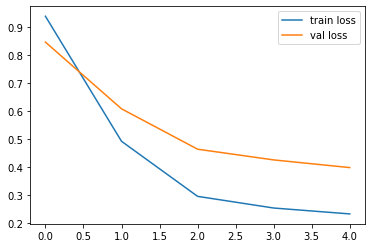

<Figure size 432x288 with 0 Axes>

In [15]:

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



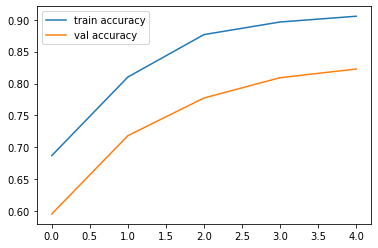

<Figure size 432x288 with 0 Axes>

In [16]:
# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

In [17]:
import tensorflow as tf

from keras.models import load_model

model.save('brain_model_vgg19.h5')

In [18]:
y_pred = model.predict(test_set)

In [19]:
y_pred

array([[9.88132775e-01, 1.18672317e-02],
       [3.37595999e-01, 6.62404001e-01],
       [5.79567015e-01, 4.20432955e-01],
       [8.06148350e-01, 1.93851635e-01],
       [1.81333832e-02, 9.81866658e-01],
       [9.61649179e-01, 3.83508205e-02],
       [5.28105021e-01, 4.71894920e-01],
       [7.08527341e-02, 9.29147243e-01],
       [4.90285724e-01, 5.09714246e-01],
       [9.93777037e-01, 6.22296706e-03],
       [1.51768789e-01, 8.48231196e-01],
       [9.67699409e-01, 3.23005579e-02],
       [3.60877886e-02, 9.63912189e-01],
       [9.89233375e-01, 1.07665937e-02],
       [3.33534032e-01, 6.66466057e-01],
       [5.98526180e-01, 4.01473790e-01],
       [9.90738869e-01, 9.26106330e-03],
       [8.80270422e-01, 1.19729616e-01],
       [9.81417000e-01, 1.85829494e-02],
       [9.98345494e-01, 1.65455882e-03],
       [1.70480497e-02, 9.82951939e-01],
       [2.97632486e-01, 7.02367485e-01],
       [6.45087361e-01, 3.54912549e-01],
       [7.55396709e-02, 9.24460292e-01],
       [5.760081

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=0)

In [21]:
y_pred

array([ 40, 125], dtype=int64)

In [22]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_resnet50.h5')

OSError: SavedModel file does not exist at: model_resnet50.h5/{saved_model.pbtxt|saved_model.pb}

In [ ]:
img=image.load_img('Datasets/Test/Autistic/002.jpg',target_size=(224,224))

In [ ]:

x=image.img_to_array(img)
x